# Anomaly Detection - Autoencoder

In [1]:
import time

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from silence_tensorflow import silence_tensorflow
silence_tensorflow()

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam

import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Training Dataset

In [2]:
y_tmp = np.frombuffer(open("Data/train-labels.idx1-ubyte", 'rb').read(), dtype=np.uint8, offset=8)

print(y_tmp.shape)

(60000,)


In [3]:
y = np.ones_like(y_tmp, dtype=int)

print(y.shape)

(60000,)


In [4]:
X = np.frombuffer(open("Data/train-images.idx3-ubyte", 'rb').read(), dtype=np.uint8, offset=16).reshape(len(y), 784)

print(X.shape)

(60000, 784)


## Having a Look at the Dataset

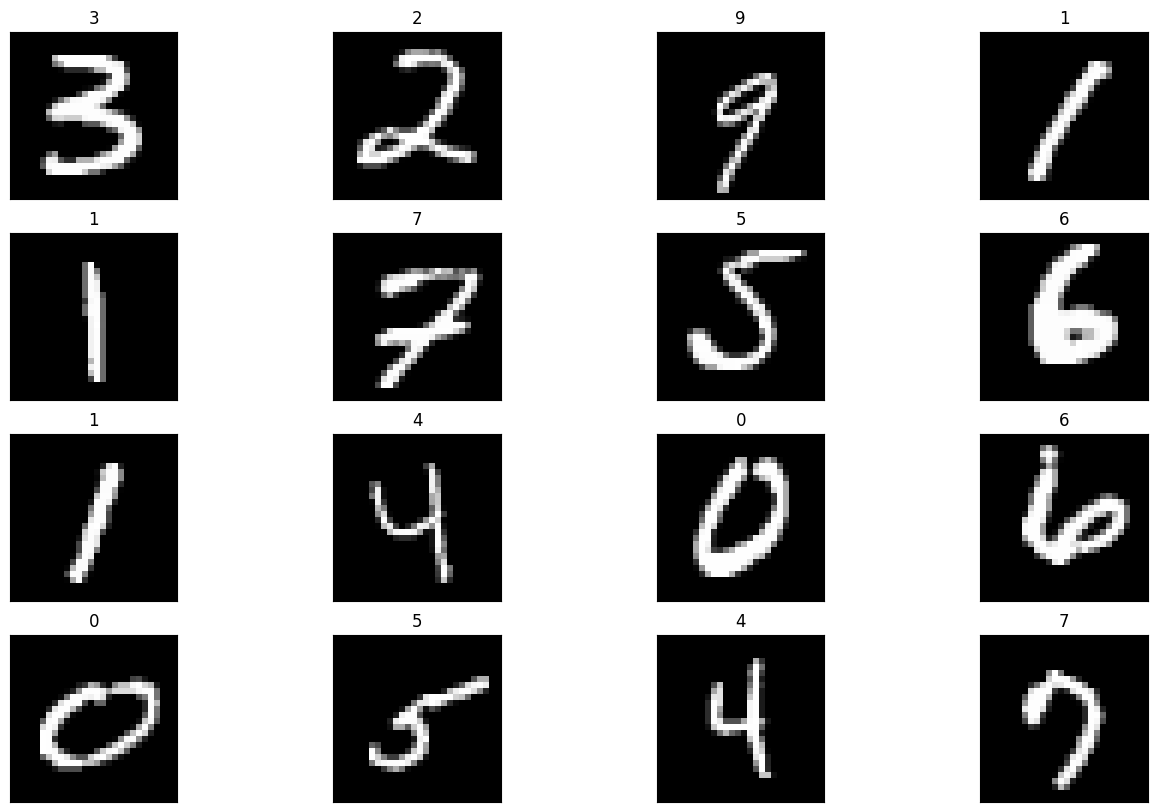

In [5]:
indices = np.random.randint(0, high=len(X), size=16)

fig, axs = plt.subplots(4, 4, figsize=(16, 10), dpi=100)

axs[0, 0].set_title(str(y_tmp[indices[0]]))
axs[0, 0].imshow(np.reshape(X[indices[0]], (28, 28)), cmap='gray')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].set_title(str(y_tmp[indices[1]]))
axs[0, 1].imshow(np.reshape(X[indices[1]], (28, 28)), cmap='gray')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[0, 2].set_title(str(y_tmp[indices[2]]))
axs[0, 2].imshow(np.reshape(X[indices[2]], (28, 28)), cmap='gray')
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])

axs[0, 3].set_title(str(y_tmp[indices[3]]))
axs[0, 3].imshow(np.reshape(X[indices[3]], (28, 28)), cmap='gray')
axs[0, 3].set_xticks([])
axs[0, 3].set_yticks([])

axs[1, 0].set_title(str(y_tmp[indices[4]]))
axs[1, 0].imshow(np.reshape(X[indices[4]], (28, 28)), cmap='gray')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].set_title(str(y_tmp[indices[5]]))
axs[1, 1].imshow(np.reshape(X[indices[5]], (28, 28)), cmap='gray')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

axs[1, 2].set_title(str(y_tmp[indices[6]]))
axs[1, 2].imshow(np.reshape(X[indices[6]], (28, 28)), cmap='gray')
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])

axs[1, 3].set_title(str(y_tmp[indices[7]]))
axs[1, 3].imshow(np.reshape(X[indices[7]], (28, 28)), cmap='gray')
axs[1, 3].set_xticks([])
axs[1, 3].set_yticks([])

axs[2, 0].set_title(str(y_tmp[indices[8]]))
axs[2, 0].imshow(np.reshape(X[indices[8]], (28, 28)), cmap='gray')
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])

axs[2, 1].set_title(str(y_tmp[indices[9]]))
axs[2, 1].imshow(np.reshape(X[indices[9]], (28, 28)), cmap='gray')
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])

axs[2, 2].set_title(str(y_tmp[indices[10]]))
axs[2, 2].imshow(np.reshape(X[indices[10]], (28, 28)), cmap='gray')
axs[2, 2].set_xticks([])
axs[2, 2].set_yticks([])

axs[2, 3].set_title(str(y_tmp[indices[11]]))
axs[2, 3].imshow(np.reshape(X[indices[11]], (28, 28)), cmap='gray')
axs[2, 3].set_xticks([])
axs[2, 3].set_yticks([])

axs[3, 0].set_title(str(y_tmp[indices[12]]))
axs[3, 0].imshow(np.reshape(X[indices[12]], (28, 28)), cmap='gray')
axs[3, 0].set_xticks([])
axs[3, 0].set_yticks([])

axs[3, 1].set_title(str(y_tmp[indices[13]]))
axs[3, 1].imshow(np.reshape(X[indices[13]], (28, 28)), cmap='gray')
axs[3, 1].set_xticks([])
axs[3, 1].set_yticks([])

axs[3, 2].set_title(str(y_tmp[indices[14]]))
axs[3, 2].imshow(np.reshape(X[indices[14]], (28, 28)), cmap='gray')
axs[3, 2].set_xticks([])
axs[3, 2].set_yticks([])

axs[3, 3].set_title(str(y_tmp[indices[15]]))
axs[3, 3].imshow(np.reshape(X[indices[15]], (28, 28)), cmap='gray')
axs[3, 3].set_xticks([])
axs[3, 3].set_yticks([])

plt.show()

## Data Preprocessing

In [6]:
X = X / 255.

## Splitting

In [7]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

In [8]:
print(X_train.shape)

(48000, 784)


In [9]:
print(y_train.shape)

(48000,)


In [10]:
print(X_validation.shape)

(12000, 784)


In [11]:
print(y_validation.shape)

(12000,)


## Model Construction

In [12]:
latent_dim = 64

In [13]:
encoder = Sequential([Dense(latent_dim, activation='relu', input_shape=[X.shape[1]])])

In [14]:
decoder = Sequential([Dense(X.shape[1], activation='sigmoid', input_shape=[latent_dim])])

In [15]:
autoencoder = Sequential([encoder, decoder])

## Model Compilation

In [16]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

In [17]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64)                50240     
                                                                 
 sequential_1 (Sequential)   (None, 784)               50960     
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the Model

In [18]:
startTime = time.time()
history = autoencoder.fit(x=X_train, y=X_train, batch_size=X_train.shape[0], epochs=1000, verbose=0, validation_data=(X_validation, X_validation))
stopTime = time.time()

print("Training duration:", stopTime - startTime)

Training duration: 338.4004123210907


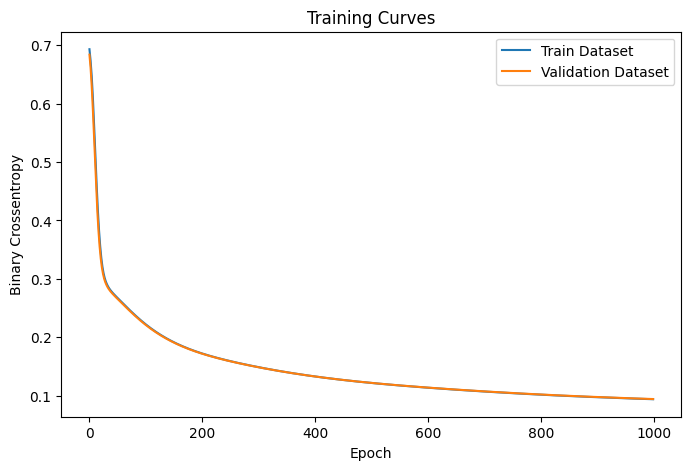

In [19]:
plt.figure(figsize=(8, 5), dpi=100)
plt.title('Training Curves')
plt.plot(history.history['loss'], label="Train Dataset")
plt.plot(history.history['val_loss'], label="Validation Dataset")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.legend()
plt.show()

## Visualizing Original and Reconstructed Images

In [20]:
X_predict_train = autoencoder.predict(X_train)

1500/1500 [==============================] - 2s 1ms/step


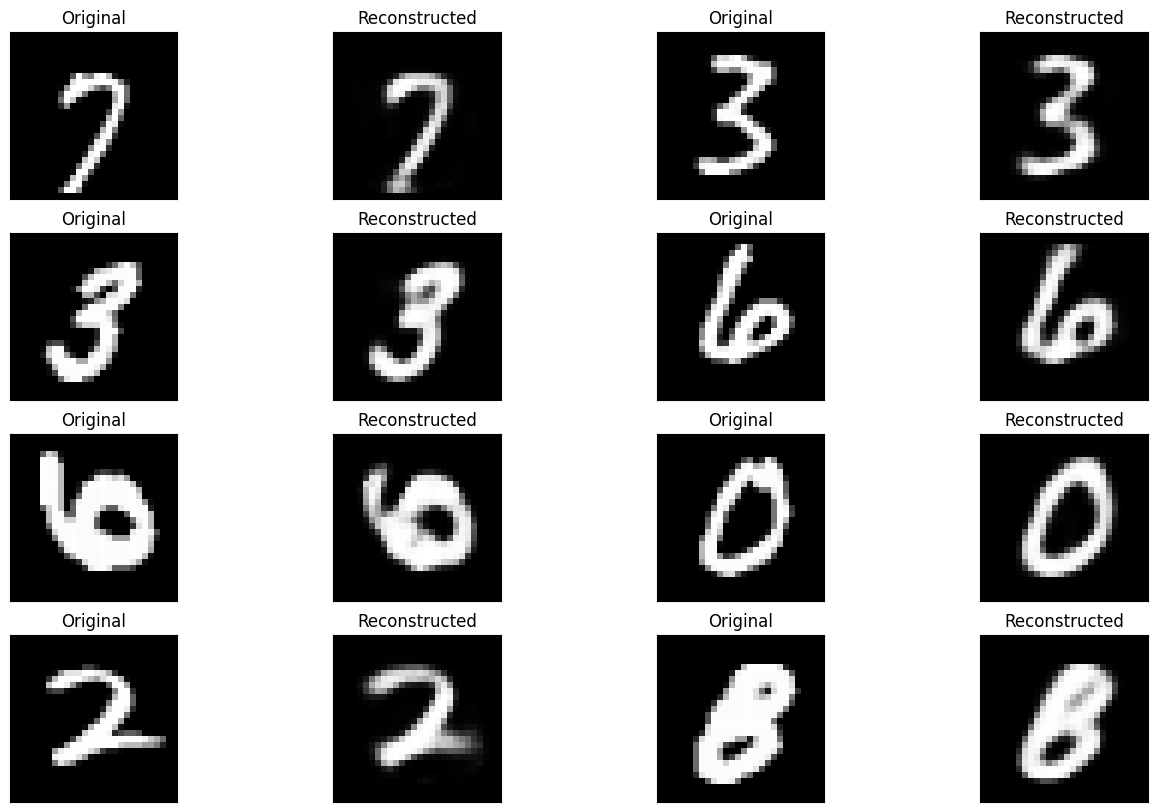

In [21]:
indices = np.random.randint(0, high=len(X_train), size=8)

fig, axs = plt.subplots(4, 4, figsize=(16, 10), dpi=100)

axs[0, 0].set_title('Original')
axs[0, 0].imshow(np.reshape(X_train[indices[0]], (28, 28)), cmap='gray')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].set_title('Reconstructed')
axs[0, 1].imshow(np.reshape(X_predict_train[indices[0]], (28, 28)), cmap='gray')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[0, 2].set_title('Original')
axs[0, 2].imshow(np.reshape(X_train[indices[1]], (28, 28)), cmap='gray')
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])

axs[0, 3].set_title('Reconstructed')
axs[0, 3].imshow(np.reshape(X_predict_train[indices[1]], (28, 28)), cmap='gray')
axs[0, 3].set_xticks([])
axs[0, 3].set_yticks([])

axs[1, 0].set_title('Original')
axs[1, 0].imshow(np.reshape(X_train[indices[2]], (28, 28)), cmap='gray')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].set_title('Reconstructed')
axs[1, 1].imshow(np.reshape(X_predict_train[indices[2]], (28, 28)), cmap='gray')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

axs[1, 2].set_title('Original')
axs[1, 2].imshow(np.reshape(X_train[indices[3]], (28, 28)), cmap='gray')
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])

axs[1, 3].set_title('Reconstructed')
axs[1, 3].imshow(np.reshape(X_predict_train[indices[3]], (28, 28)), cmap='gray')
axs[1, 3].set_xticks([])
axs[1, 3].set_yticks([])

axs[2, 0].set_title('Original')
axs[2, 0].imshow(np.reshape(X_train[indices[4]], (28, 28)), cmap='gray')
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])

axs[2, 1].set_title('Reconstructed')
axs[2, 1].imshow(np.reshape(X_predict_train[indices[4]], (28, 28)), cmap='gray')
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])

axs[2, 2].set_title('Original')
axs[2, 2].imshow(np.reshape(X_train[indices[5]], (28, 28)), cmap='gray')
axs[2, 2].set_xticks([])
axs[2, 2].set_yticks([])

axs[2, 3].set_title('Reconstructed')
axs[2, 3].imshow(np.reshape(X_predict_train[indices[5]], (28, 28)), cmap='gray')
axs[2, 3].set_xticks([])
axs[2, 3].set_yticks([])

axs[3, 0].set_title('Original')
axs[3, 0].imshow(np.reshape(X_train[indices[6]], (28, 28)), cmap='gray')
axs[3, 0].set_xticks([])
axs[3, 0].set_yticks([])

axs[3, 1].set_title('Reconstructed')
axs[3, 1].imshow(np.reshape(X_predict_train[indices[6]], (28, 28)), cmap='gray')
axs[3, 1].set_xticks([])
axs[3, 1].set_yticks([])

axs[3, 2].set_title('Original')
axs[3, 2].imshow(np.reshape(X_train[indices[7]], (28, 28)), cmap='gray')
axs[3, 2].set_xticks([])
axs[3, 2].set_yticks([])

axs[3, 3].set_title('Reconstructed')
axs[3, 3].imshow(np.reshape(X_predict_train[indices[7]], (28, 28)), cmap='gray')
axs[3, 3].set_xticks([])
axs[3, 3].set_yticks([])

plt.show()

## Visualizing the Reconstruction Errors

### Computing MSE From the Train Dataset

In [22]:
train_mse = np.mean(np.square(X_train - autoencoder.predict(X_train)), axis=1)

1500/1500 [==============================] - 2s 1ms/step


### Computing MSE From the Validation Dataset

In [23]:
validation_mse = np.mean(np.square(X_validation - autoencoder.predict(X_validation)), axis=1)

375/375 [==============================] - 0s 1ms/step


### Reconstruction Errors

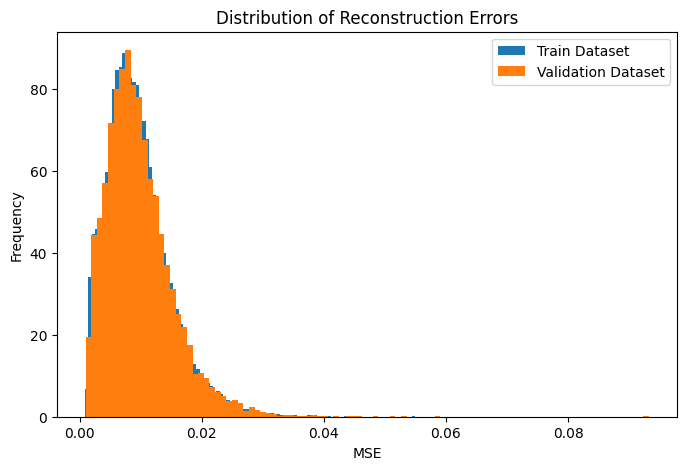

In [24]:
plt.figure(figsize=(8, 5), dpi=100)
plt.title('Distribution of Reconstruction Errors')
plt.hist(train_mse, bins=100, density=True, label='Train Dataset')
plt.hist(validation_mse, bins=100, density=True, label='Validation Dataset')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Choosing the Reconstruction Error Threshold

In [25]:
threshold = 0.018

y_predict_train = np.where(train_mse < threshold, 1, -1)
y_predict_validation = np.where(validation_mse < threshold, 1, -1)

## Performances on the Train Dataset

In [26]:
cm = confusion_matrix(y_train, y_predict_train, normalize='true')

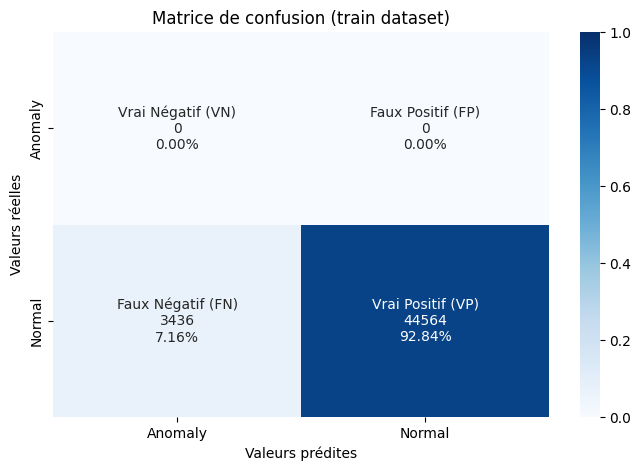

In [27]:
names = ['Vrai Négatif (VN)', 'Faux Positif (FP)','Faux Négatif (FN)', 'Vrai Positif (VP)']
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_train, y_predict_train, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_train, y_predict_train, normalize='true').flatten()]

box_labels = [f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (train dataset)")

sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=['Anomaly', 'Normal'],
            yticklabels=['Anomaly', 'Normal'])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()

## Performances on the Validation Dataset

In [28]:
cm = confusion_matrix(y_validation, y_predict_validation, normalize='true')

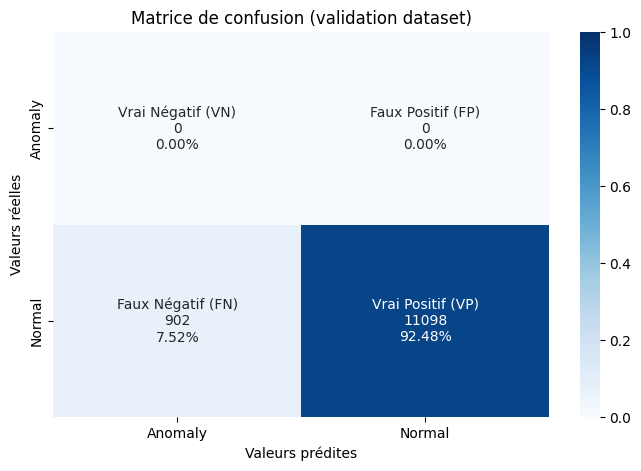

In [29]:
names = ['Vrai Négatif (VN)', 'Faux Positif (FP)','Faux Négatif (FN)', 'Vrai Positif (VP)']
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_validation, y_predict_validation, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_validation, y_predict_validation, normalize='true').flatten()]

box_labels = [f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (validation dataset)")

sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=['Anomaly', 'Normal'],
            yticklabels=['Anomaly', 'Normal'])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()

## Performances on the Test Dataset

### Loading the Test Dataset

In [30]:
y_test = np.load('Data/y_test.npy')

In [31]:
X_test = np.load('Data/X_test.npy').reshape(len(y_test), 784)

print(X_test.shape)

(20000, 784)


### Having a Look at the Dataset

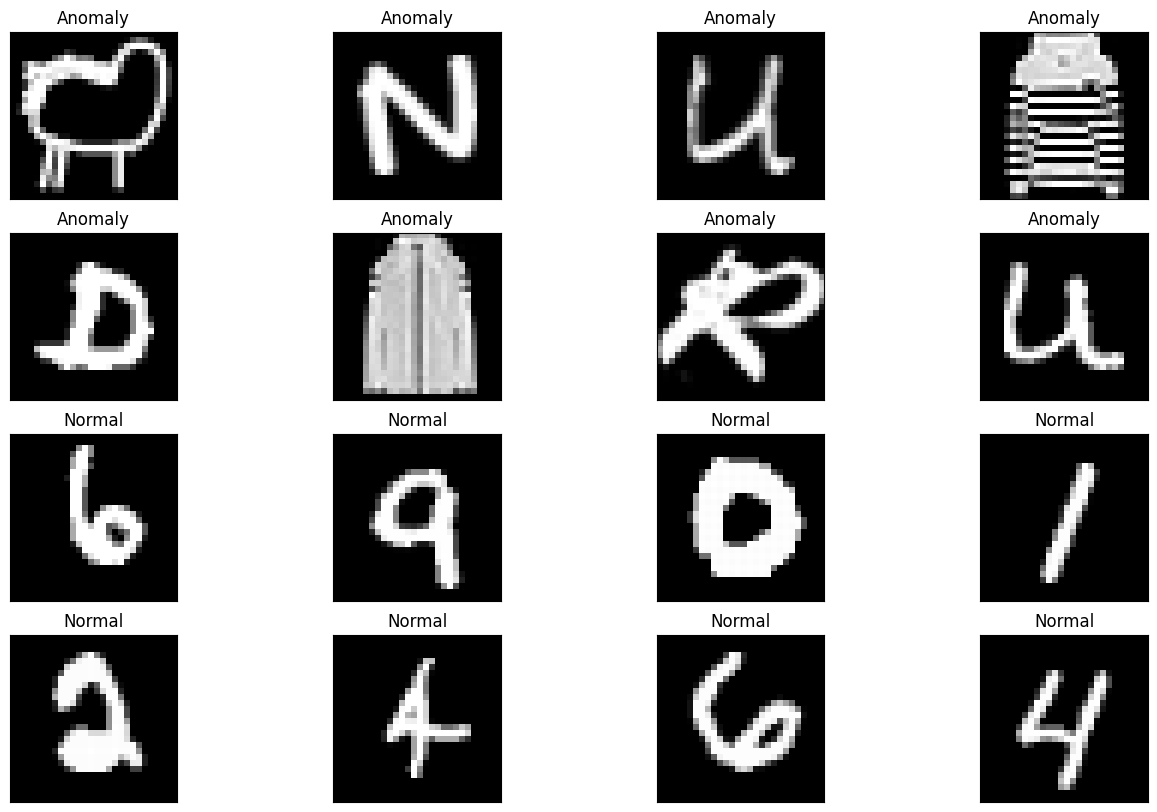

In [32]:
indices_a = np.random.randint(0, 10000, size=8)
indices_n = np.random.randint(10000, 20000, size=8)

fig, axs = plt.subplots(4, 4, figsize=(16, 10), dpi=100)

axs[0, 0].set_title('Anomaly')
axs[0, 0].imshow(np.reshape(X_test[indices_a[0]], (28, 28)), cmap='gray')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].set_title('Anomaly')
axs[0, 1].imshow(np.reshape(X_test[indices_a[1]], (28, 28)), cmap='gray')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[0, 2].set_title('Anomaly')
axs[0, 2].imshow(np.reshape(X_test[indices_a[2]], (28, 28)), cmap='gray')
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])

axs[0, 3].set_title('Anomaly')
axs[0, 3].imshow(np.reshape(X_test[indices_a[3]], (28, 28)), cmap='gray')
axs[0, 3].set_xticks([])
axs[0, 3].set_yticks([])

axs[1, 0].set_title('Anomaly')
axs[1, 0].imshow(np.reshape(X_test[indices_a[4]], (28, 28)), cmap='gray')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].set_title('Anomaly')
axs[1, 1].imshow(np.reshape(X_test[indices_a[5]], (28, 28)), cmap='gray')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

axs[1, 2].set_title('Anomaly')
axs[1, 2].imshow(np.reshape(X_test[indices_a[6]], (28, 28)), cmap='gray')
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])

axs[1, 3].set_title('Anomaly')
axs[1, 3].imshow(np.reshape(X_test[indices_a[7]], (28, 28)), cmap='gray')
axs[1, 3].set_xticks([])
axs[1, 3].set_yticks([])

axs[2, 0].set_title('Normal')
axs[2, 0].imshow(np.reshape(X_test[indices_n[0]], (28, 28)), cmap='gray')
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])

axs[2, 1].set_title('Normal')
axs[2, 1].imshow(np.reshape(X_test[indices_n[1]], (28, 28)), cmap='gray')
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])

axs[2, 2].set_title('Normal')
axs[2, 2].imshow(np.reshape(X_test[indices_n[2]], (28, 28)), cmap='gray')
axs[2, 2].set_xticks([])
axs[2, 2].set_yticks([])

axs[2, 3].set_title('Normal')
axs[2, 3].imshow(np.reshape(X_test[indices_n[3]], (28, 28)), cmap='gray')
axs[2, 3].set_xticks([])
axs[2, 3].set_yticks([])

axs[3, 0].set_title('Normal')
axs[3, 0].imshow(np.reshape(X_test[indices_n[4]], (28, 28)), cmap='gray')
axs[3, 0].set_xticks([])
axs[3, 0].set_yticks([])

axs[3, 1].set_title('Normal')
axs[3, 1].imshow(np.reshape(X_test[indices_n[5]], (28, 28)), cmap='gray')
axs[3, 1].set_xticks([])
axs[3, 1].set_yticks([])

axs[3, 2].set_title('Normal')
axs[3, 2].imshow(np.reshape(X_test[indices_n[6]], (28, 28)), cmap='gray')
axs[3, 2].set_xticks([])
axs[3, 2].set_yticks([])

axs[3, 3].set_title('Normal')
axs[3, 3].imshow(np.reshape(X_test[indices_n[7]], (28, 28)), cmap='gray')
axs[3, 3].set_xticks([])
axs[3, 3].set_yticks([])

plt.show()

### Visualizing Original and Reconstructed Images

In [33]:
X_predict_test = autoencoder.predict(X_test)

625/625 [==============================] - 1s 1ms/step


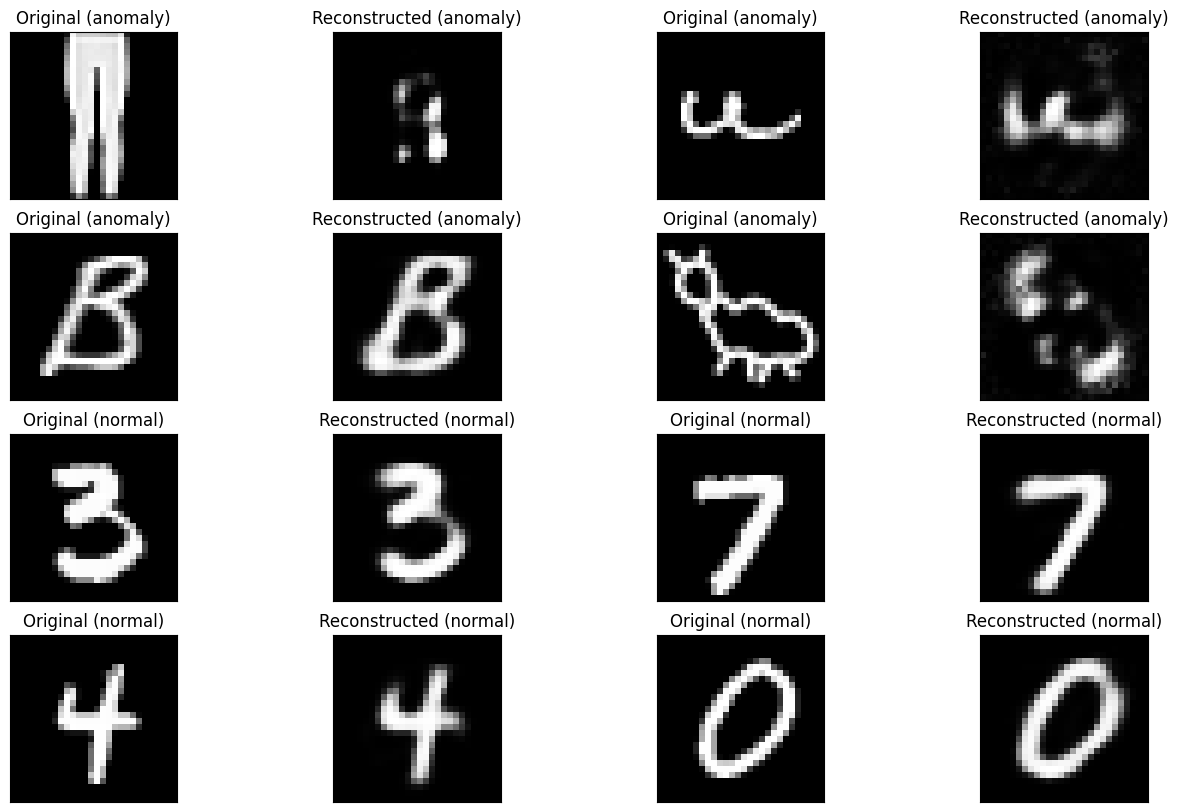

In [34]:
indices_a = np.random.randint(0, 10000, size=4)
indices_n = np.random.randint(10000, 20000, size=4)

fig, axs = plt.subplots(4, 4, figsize=(16, 10), dpi=100)

axs[0, 0].set_title('Original (anomaly)')
axs[0, 0].imshow(np.reshape(X_test[indices_a[0]], (28, 28)), cmap='gray')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].set_title('Reconstructed (anomaly)')
axs[0, 1].imshow(np.reshape(X_predict_test[indices_a[0]], (28, 28)), cmap='gray')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[0, 2].set_title('Original (anomaly)')
axs[0, 2].imshow(np.reshape(X_test[indices_a[1]], (28, 28)), cmap='gray')
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])

axs[0, 3].set_title('Reconstructed (anomaly)')
axs[0, 3].imshow(np.reshape(X_predict_test[indices_a[1]], (28, 28)), cmap='gray')
axs[0, 3].set_xticks([])
axs[0, 3].set_yticks([])

axs[1, 0].set_title('Original (anomaly)')
axs[1, 0].imshow(np.reshape(X_test[indices_a[2]], (28, 28)), cmap='gray')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].set_title('Reconstructed (anomaly)')
axs[1, 1].imshow(np.reshape(X_predict_test[indices_a[2]], (28, 28)), cmap='gray')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

axs[1, 2].set_title('Original (anomaly)')
axs[1, 2].imshow(np.reshape(X_test[indices_a[3]], (28, 28)), cmap='gray')
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])

axs[1, 3].set_title('Reconstructed (anomaly)')
axs[1, 3].imshow(np.reshape(X_predict_test[indices_a[3]], (28, 28)), cmap='gray')
axs[1, 3].set_xticks([])
axs[1, 3].set_yticks([])

axs[2, 0].set_title('Original (normal)')
axs[2, 0].imshow(np.reshape(X_test[indices_n[0]], (28, 28)), cmap='gray')
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])

axs[2, 1].set_title('Reconstructed (normal)')
axs[2, 1].imshow(np.reshape(X_predict_test[indices_n[0]], (28, 28)), cmap='gray')
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])

axs[2, 2].set_title('Original (normal)')
axs[2, 2].imshow(np.reshape(X_test[indices_n[1]], (28, 28)), cmap='gray')
axs[2, 2].set_xticks([])
axs[2, 2].set_yticks([])

axs[2, 3].set_title('Reconstructed (normal)')
axs[2, 3].imshow(np.reshape(X_predict_test[indices_n[1]], (28, 28)), cmap='gray')
axs[2, 3].set_xticks([])
axs[2, 3].set_yticks([])

axs[3, 0].set_title('Original (normal)')
axs[3, 0].imshow(np.reshape(X_test[indices_n[2]], (28, 28)), cmap='gray')
axs[3, 0].set_xticks([])
axs[3, 0].set_yticks([])

axs[3, 1].set_title('Reconstructed (normal)')
axs[3, 1].imshow(np.reshape(X_predict_test[indices_n[2]], (28, 28)), cmap='gray')
axs[3, 1].set_xticks([])
axs[3, 1].set_yticks([])

axs[3, 2].set_title('Original (normal)')
axs[3, 2].imshow(np.reshape(X_test[indices_n[3]], (28, 28)), cmap='gray')
axs[3, 2].set_xticks([])
axs[3, 2].set_yticks([])

axs[3, 3].set_title('Reconstructed (normal)')
axs[3, 3].imshow(np.reshape(X_predict_test[indices_n[3]], (28, 28)), cmap='gray')
axs[3, 3].set_xticks([])
axs[3, 3].set_yticks([])

plt.show()

### Computing MSE From the Test Dataset

In [35]:
test_mse = np.mean(np.square(X_test - autoencoder.predict(X_test)), axis=1)

625/625 [==============================] - 1s 1ms/step


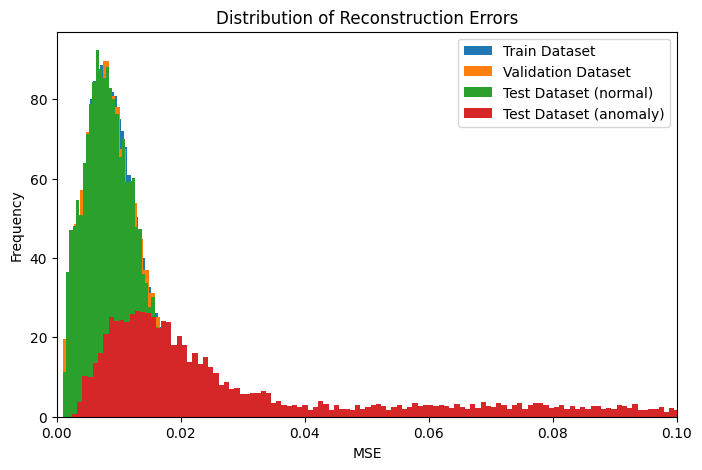

In [36]:
plt.figure(figsize=(8, 5), dpi=100)
plt.title('Distribution of Reconstruction Errors')
plt.hist(train_mse, bins=100, density=True, label='Train Dataset')
plt.hist(validation_mse, bins=100, density=True, label='Validation Dataset')
plt.hist(test_mse[np.where(y_test == +1)], bins=100, density=True, label='Test Dataset (normal)')
plt.hist(test_mse[np.where(y_test == -1)], bins=1000, density=True, label='Test Dataset (anomaly)')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0.0, 0.1)
plt.show()

### Performances on the Test Dataset

In [37]:
y_predict_test = np.where(test_mse < threshold, 1, -1)

In [38]:
cm = confusion_matrix(y_test, y_predict_test, normalize='true')

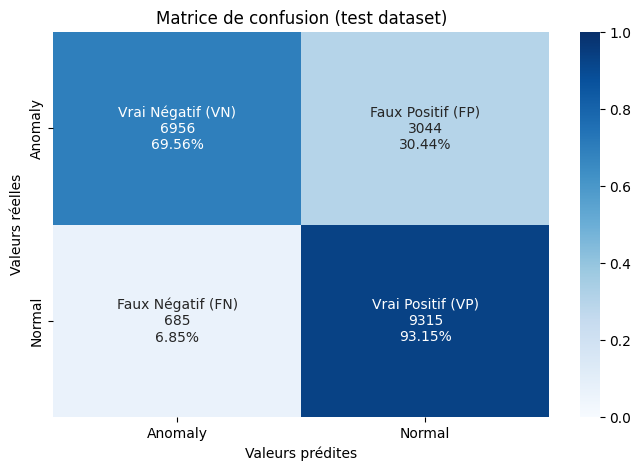

In [39]:
names = ['Vrai Négatif (VN)', 'Faux Positif (FP)','Faux Négatif (FN)', 'Vrai Positif (VP)']
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_test, y_predict_test, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_test, y_predict_test, normalize='true').flatten()]

box_labels = [f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (test dataset)")

sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=['Anomaly', 'Normal'],
            yticklabels=['Anomaly', 'Normal'])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()